# Voronoi Graphs

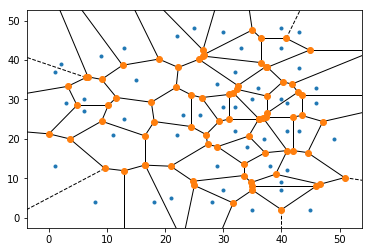

In [1]:
# Make the relevant imports including Voronoi methods
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
%matplotlib inline 

# Recreate the figure above for a new set of random points
points = np.random.randint(50, size=(50, 2))
graph = Voronoi(points)
voronoi_plot_2d(graph)
plt.show()

In [2]:
# Read in the obstacle data
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)

In [3]:
# If you want to use the prebuilt bresenham method, need to install it
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install bresenham
# Import the Bresenham package
#from bresenham import bresenham

In [4]:
# Here you'll modify the `create_grid()` method from a previous exercise
# In this new function you'll record obstacle centres and
# create a Voronoi graph around those points
def create_grid_and_edges(data, drone_altitude):
    """
    Returns a grid representation of a 2D configuration space
    along with Voronoi graph edges given obstacle data and the
    drone's altitude.
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.amin(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.amax(data[:, 0] + data[:, 3]))

    # minimum and maximum east coordinates
    east_min = np.floor(np.amin(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.amax(data[:, 1] + data[:, 4]))

    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil((north_max - north_min)))
    east_size = int(np.ceil((east_max - east_min)))

    # Create an empty grid and points list
    grid = np.zeros((north_size, east_size))
    points = []

    # Populate obstacle cells in the grid with value of 1
    for i in range(data.shape[0]):
        # Extract data one line at a time
        north, east, alt, d_north, d_east, d_alt = data[i, :]

        # Only consider obstacle if it extends above flight altitude
        if alt + d_alt > drone_altitude:
            # Define obstacle extent based on data
            obstacle = [
                int(north - d_north - north_min),
                int(north + d_north - north_min),
                int(east - d_east - east_min),
                int(east + d_east - east_min),
            ]
            # Set obstacle cells to 1
            grid[obstacle[0]:obstacle[1], obstacle[2]:obstacle[3]] = 1

            # add center of obstacles to points list
            points.append([north - north_min, east - east_min])

    # TODO: create a voronoi graph based on
    # location of obstacle centres

    # TODO: check each edge from graph.ridge_vertices for collision
    edges = []
    

    return grid, edges

In [5]:
# Define a flying altitude (feel free to change this)
drone_altitude = 5
grid, edges = create_grid_and_edges(data, drone_altitude)
print('Found %5d edges' % len(edges))

Found     0 edges


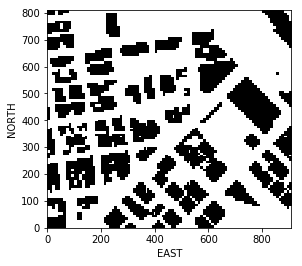

In [6]:
# equivalent to
# plt.imshow(np.flip(grid, 0))
# Plot it up!
plt.imshow(grid, origin='lower', cmap='Greys') 

# Stepping through each edge
for e in edges:
    p1 = e[0]
    p2 = e[1]
    plt.plot([p1[1], p2[1]], [p1[0], p2[0]], 'b-')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

[solution](/notebooks/Voronoi-Solution.ipynb)